In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
class Node:
    def __init__(self, left = None, right = None, class_ = None, feature = None, threshold = None):
        self.left = left
        self.right = right
        self.class_ = class_
        self.feature = feature
        self.threshold = threshold

In [93]:
class DecisionTreeClassifier:
    def __init__(self):
        self.max_depth = None
        self.root = None
        self.max_depth = None
        self.min_size = None
    
    def gini(self, y):
        labels = y.unique()
        return_value = 1.0
        for label in labels:
            p = np.sum(y == label) / len(y)  # Calculate proportion
            return_value -= p**2
        return return_value
    
    def information_gain(self, parent, left, right):
        intial_gini = self.gini(parent)
        weight_left = len(left)/len(parent)
        weight_right = len(right)/len(parent)
        return intial_gini - weight_left*self.gini(left)-weight_right*self.gini(right)
    
    def split_data(self, dataset, threshold, feature):

        dataset_left = dataset[dataset[feature] <= threshold]
        dataset_right = dataset[dataset[feature] > threshold]
        return (dataset_left, dataset_right)
        
    def best_split(self, dataset, features, target):
        best_fit = {'gain': -1, 'feature': None, 'threshold': None}
        for i, feature in enumerate(features):
            thresholds = np.unique(dataset[feature])
            for threshold in thresholds:
                left, right = self.split_data(dataset, threshold, feature)
                gain = self.information_gain(dataset[target], left[target], right[target])
                if gain > best_fit['gain']:
                    best_fit['gain'] = gain
                    best_fit['feature'] = i
                    best_fit['threshold'] = threshold
                    best_fit['right'] = right
                    best_fit['left'] = left
        return best_fit
    
    def calculate_leaf_value(self, dataset, target):
        values = dataset[target].value_counts()
        return values.idxmax()  # Most frequent label
    
    def build_tree(self, dataset, features, target, depth):
        if depth < self.max_depth and len(dataset) > self.min_size:
            best_fit = self.best_split(dataset, features, target)
            left_child = self.build_tree(best_fit['left'], features, target, depth + 1)
            right_child = self.build_tree(best_fit['right'], features, target, depth + 1)
            return Node(left = left_child,right = right_child, feature=best_fit['feature'], threshold=best_fit['threshold'])
        return Node(class_=self.calculate_leaf_value(dataset, target))
        
    def fit(self, X, y, max_depth, min_size):
        features = X.columns
        target = y.name
        self.max_depth = max_depth
        self.min_size = min_size
        self.root = self.build_tree(pd.concat((X,y),axis = 1),features,target,0)

    def predict(self, X):
        return np.array([self.return_predict(self.root, row) for _, row in X.iterrows()])

    def return_predict(self,node,features):
        if node.class_ != None:
            return node.class_
        feature = features[node.feature]
        if feature <= node.threshold:
            return self.return_predict(node.left, features)
        else:
            return self.return_predict(node.right, features)
        
    def accuracy(self, y_true, y_pred):
        correct = np.sum(y_true == y_pred)
        return correct/len(y_true)

In [3]:
df = pd.read_csv('./breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.drop('id', axis = 1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B': 0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


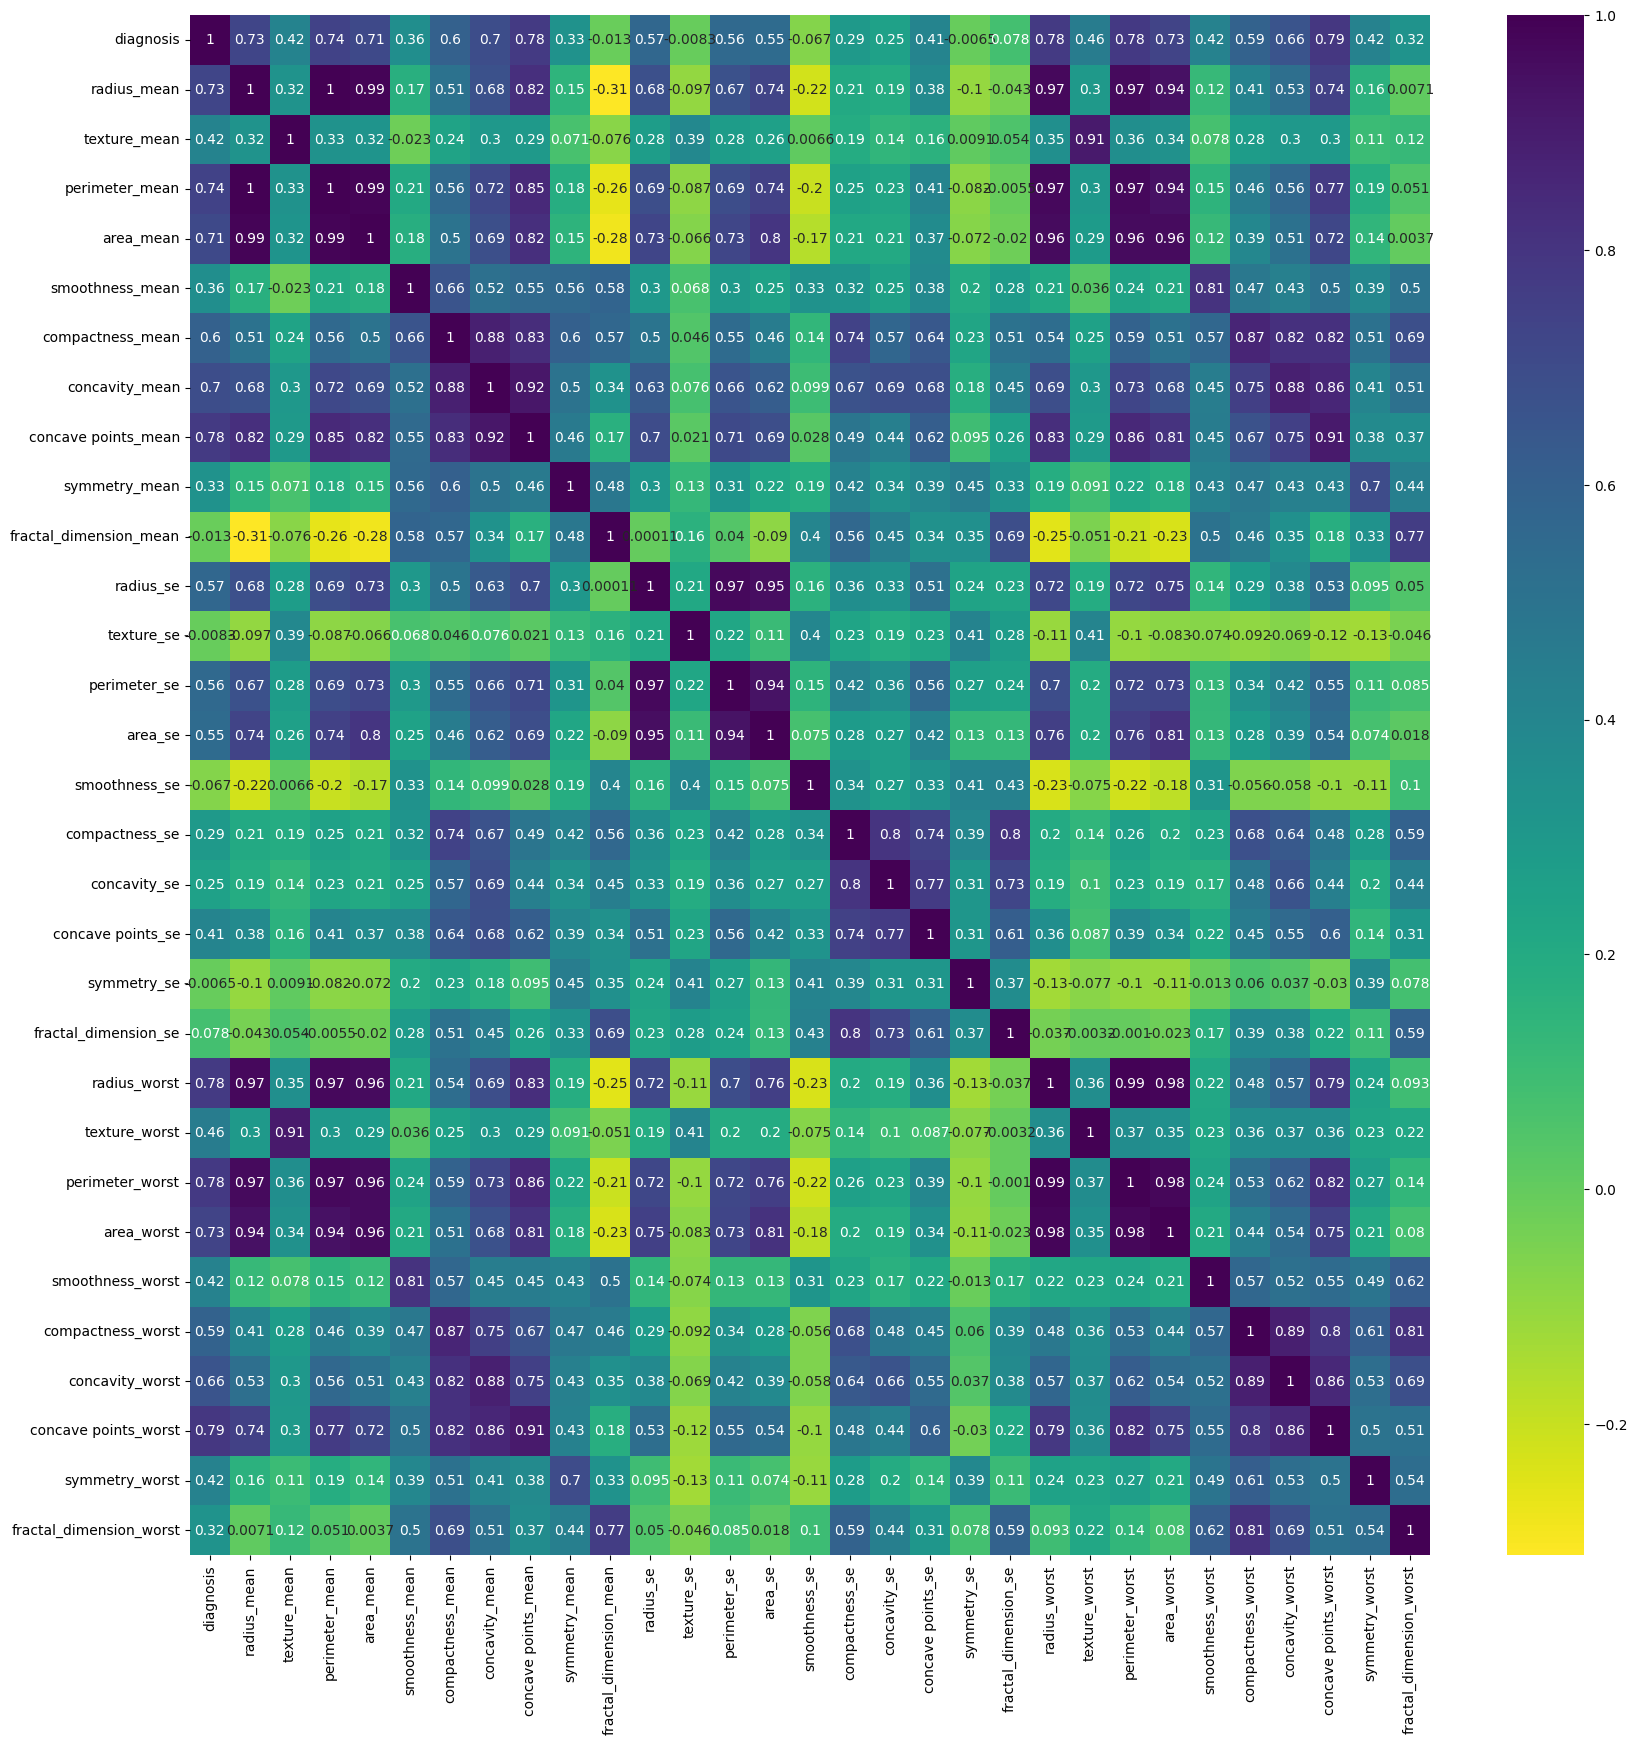

In [10]:
corr_df = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_df, annot = True, cmap='viridis_r')
plt.show()

In [22]:
relate_features = df.columns[corr_df['diagnosis'] > 0.25]
features = relate_features[1:]
target = relate_features[0]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2)

In [94]:
dct = DecisionTreeClassifier()
dct.fit(X_train, y_train, 5, 10)

In [95]:
y_pred = dct.predict((X_test))

/var/folders/qn/18wdgjxd7pq9_v70cxrqmfyh0000gn/T/ipykernel_23732/3594434279.py:68: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  feature = features[node.feature]


In [96]:
dct.accuracy(y_pred=y_pred, y_true=y_test)

0.9473684210526315